In [8]:
# CS 593
# HW_02
# Yash Kosambia 
# cwid - 10475286

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

Slope:  0.26803699905649786
Intercept:  1.0986275363281124
Correlation Coefficient:  0.7001726364203082


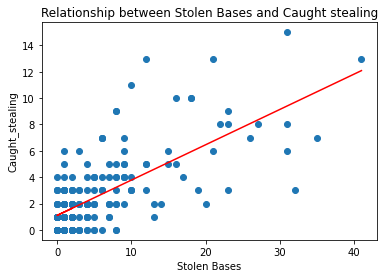

In [10]:
# Load the dataset into a pandas dataframe
# Create a scatter plot with 'caught' as the response

df = pd.read_csv('Baseball_100.csv')
df = df[df['at_bats']>=100]
plt.scatter(df['stolen_bases'], df['caught_stealing'])
plt.title('Relationship between Stolen Bases and Caught stealing')
plt.xlabel('Stolen Bases')
plt.ylabel('Caught_stealing')


# Perform a linear regression analysis


X = df[['stolen_bases']]
y = df['caught_stealing']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
plt.plot(X['stolen_bases'], model.predict(X), color='red')


# Print the slope and intercept of the linear regression line and the correlation coefficient

print('Slope: ', model.params[1])
print('Intercept: ', model.params[0])
print('Correlation Coefficient: ', df['stolen_bases'].corr(df['caught_stealing']))
plt.show()


In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        caught_stealing   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           4.06e-32
Time:                        16:41:50   Log-Likelihood:                -445.84
No. Observations:                 209   AIC:                             895.7
Df Residuals:                     207   BIC:                             902.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0986      0.177      6.216   

In [12]:
# confidence interval 

x_new = [[1, 20]] 
pred = model.predict(x_new)
print(f"Predicted number of times caught stealing: {pred[0]:.2f}")

pred_ci = model.get_prediction(x_new).conf_int()
print(f"Confidence interval for prediction: [{pred_ci[0][0]:.2f}, {pred_ci[0][1]:.2f}]")


Predicted number of times caught stealing: 6.46
Confidence interval for prediction: [5.85, 7.07]




Top 5 influential points using Cook's distance: 


    dfb_const  dfb_stolen_bases   cooks_d  standard_resid  hat_diag  \
3    0.322114         -0.873787  0.391577       -3.363155  0.064756   
2   -0.249987          0.694930  0.253487        2.810589  0.060308   
5    0.197672         -0.504588  0.134103       -1.766749  0.079126   
15  -0.094940          0.458231  0.124130        3.095334  0.025257   
10   0.150471         -0.418290  0.094130       -1.712709  0.060308   

    dffits_internal  student_resid    dffits  
3         -0.884960      -3.450620 -0.907974  
2          0.712022       2.858872  0.724253  
5         -0.517886      -1.775917 -0.520573  
15         0.498256       3.161890  0.508970  
10        -0.433890      -1.720803 -0.435940  


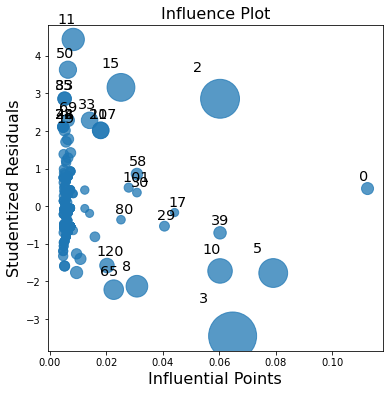

In [13]:
# Top 5 influential points using Cook's distance
# using cook as per instructions 

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
summary = influence.summary_frame()
top_5 = summary.iloc[cooks_d.argsort()[:-6:-1]]
print('\n\nTop 5 influential points using Cook\'s distance: \n\n')
print(top_5)


fig, ax = plt.subplots(figsize=(6, 6))
influence_plot = sm.graphics.influence_plot(model, ax=ax)
plt.xlabel('Influential Points')
plt.show()



 Top 5 Levrage Points


    dfb_const  dfb_stolen_bases   cooks_d  standard_resid  hat_diag  \
0   -0.069889          0.163970  0.014093        0.471569  0.112492   
5    0.197672         -0.504588  0.134103       -1.766749  0.079126   
3    0.322114         -0.873787  0.391577       -3.363155  0.064756   
10   0.150471         -0.418290  0.094130       -1.712709  0.060308   
2   -0.249987          0.694930  0.253487        2.810589  0.060308   

    dffits_internal  student_resid    dffits  
0          0.167888       0.470681  0.167572  
5         -0.517886      -1.775917 -0.520573  
3         -0.884960      -3.450620 -0.907974  
10        -0.433890      -1.720803 -0.435940  
2          0.712022       2.858872  0.724253  


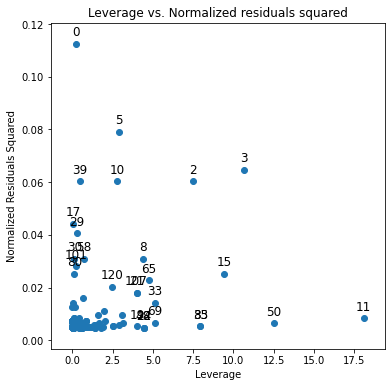

In [14]:
# Top 5 High Leverage points 

influence = model.get_influence()
summary = influence.summary_frame()
high_leverage = summary.sort_values('hat_diag', ascending=False).head(5)
print("\n\n Top 5 Levrage Points\n\n")
print(high_leverage)

fig, ax = plt.subplots(figsize=(6, 6))
leverage_resid2 = sm.graphics.plot_leverage_resid2(model, ax=ax)
plt.xlabel('Leverage')
plt.ylabel('Normalized Residuals Squared')
plt.show()